<a href="https://colab.research.google.com/github/sundarp17/Data-science/blob/main/Machine-learning/clustering/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster,cophenet
from scipy.spatial.distance import pdist


In [ ]:
plt.figure(figsize=(10,3))

In [ ]:
cars=pd.read_csv(r'/content/mtcars.csv')

cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
x = cars[['mpg','disp','hp','wt']].values
y = cars['am'].values
y

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

using scipy to generate dendograms

In [ ]:
z = linkage(x,'ward')

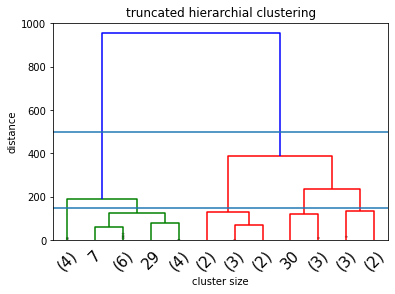

In [ ]:
dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation =45,leaf_font_size=15,show_contracted=True)
plt.title('truncated hierarchial clustering')
plt.xlabel('cluster size')
plt.ylabel('distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

since 'am' is our target variable, which represents either manual or automatic. So, we can choose number of clusters as 2.

Generating hierarchical clusters

In [ ]:
k=2
hcluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
hcluster.fit(x)

sklearn.metrics.accuracy_score(y,hcluster.labels_)

0.78125

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
hcluster.fit(x)

sklearn.metrics.accuracy_score(y,hcluster.labels_)

0.4375

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')
hcluster.fit(x)

sklearn.metrics.accuracy_score(y,hcluster.labels_)

0.78125

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average')
hcluster.fit(x)

sklearn.metrics.accuracy_score(y,hcluster.labels_)

0.71875